## REMEMBER TO COMMIT THINGS

$y = \beta_1 \times X_1 + \beta_2 \times X_2 + ...$

In [54]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, 'code')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Nice fonts
import matplotlib.font_manager
import matplotlib
prop = matplotlib.font_manager.FontProperties(fname="c:\\windows\\fonts\\nunitosans-light.ttf")
matplotlib.rcParams['font.family'] = prop.get_name()
matplotlib.rcParams['font.weight'] = 'light'
matplotlib.rcParams['axes.facecolor'] = '#fbfbfb'

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from predators import *


code\predators.py:85: UserWarning: Cluster size for feature is zero
  warnings.warn("Cluster size for feature is zero")


(11, 9)


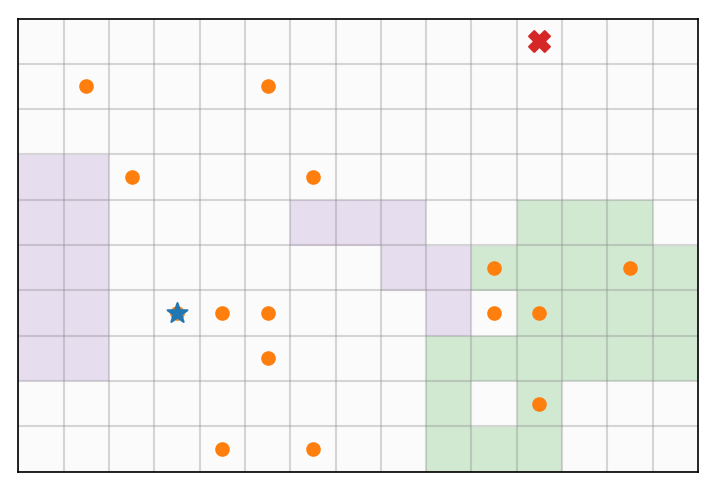

In [519]:
predator = Agent(('1*Prey_1 + (-1*Shadow) + 0.1*Water'), name='Predator_1', policy='pessimism', w=0.8)
prey = Agent(('1*reward'), name='Prey_1')
f1 = EnvironmentFeature(n_clusters=3, cluster_size_mean=15, cluster_size_sd=10, name='Water')
f2 = EnvironmentFeature(n_clusters=3, cluster_size_mean=15, cluster_size_sd=10, name='Shadow')
# edge_array = np.ones((10, 15), dtype = int)
# edge_array[1:-1,1:-1] = 0
# f3 = EnvironmentFeature(feature_array=edge_array, name='Edge')
env = PredatorEnvironment(features=[f1, f2], n_rewards=15, agents=[predator, prey], name='Environment_1')
env.plot_environment()


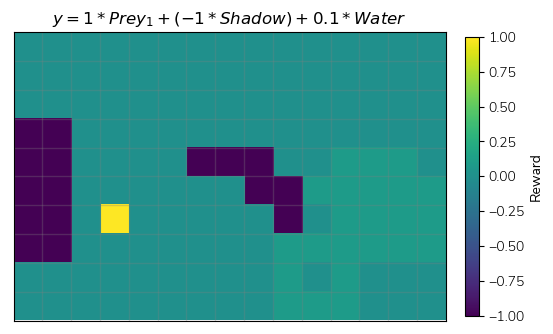

In [534]:
predator.plot_state_rewards()

In [421]:
plt.imshow(predator.distance_arrays['Water'], origin='lower')

KeyError: 'Water'

In [539]:
predator.solve(terminal=prey.idx, max_iter=20)

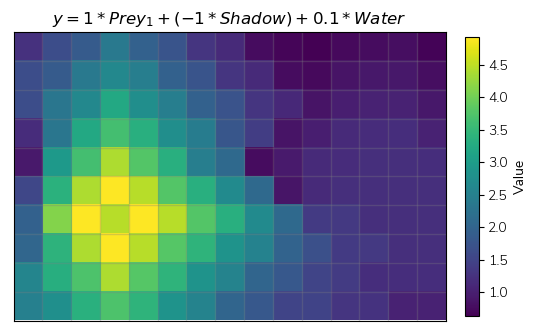

In [540]:
predator.plot_state_values()

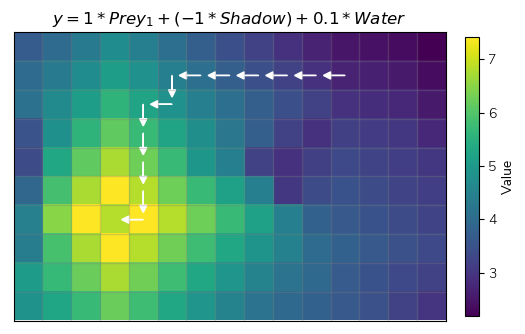

In [531]:
predator.plot_policy()

(11, 8)


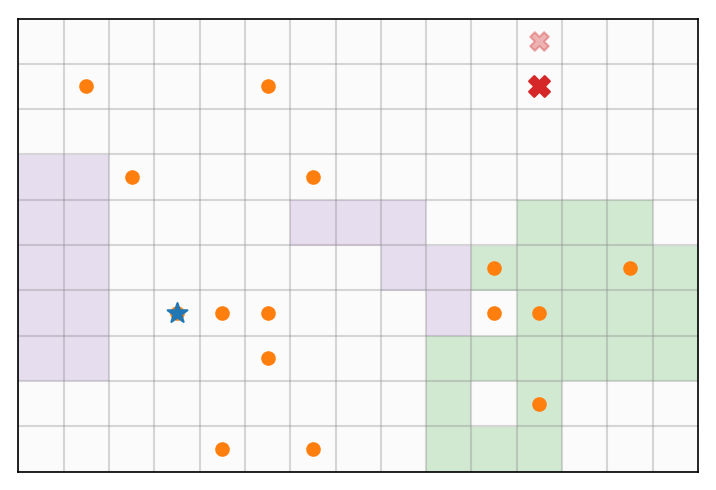

In [529]:
env.plot_environment()

In [525]:
predator.idx

(11, 9)

In [527]:
predator.move_history

[(11, 9)]

In [528]:
predator.move()

C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\sisyphus\mdp\_dp.py:144: UserWarning: Reached maximum iterations.
  warn('Reached maximum iterations.')


In [430]:
predator.solver.pi

[126, 111, 96]

In [396]:
np.argmax(predator.solver.V)

30

In [400]:
np.argmax(predator.state_rewards.flatten())

45

In [392]:
predator.info

,S,S',R,T
0,0,[0],[0.0],[1.0]
1,1,"[0, 2, 16]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
2,1,"[16, 0, 2]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
3,1,"[2, 16, 0]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
4,2,"[1, 3, 17]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
5,2,"[17, 1, 3]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
6,2,"[3, 17, 1]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
7,3,[3],[0.0],[1.0]
8,4,"[3, 5, 19]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"
9,4,"[19, 3, 5]","[0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]"


In [365]:
cc = predator.info.copy()

In [373]:
s = 0
a,  = cc.loc[cc['S'] == (14, 2), "S'"]

ValueError: not enough values to unpack (expected 1, got 0)

In [374]:
cc['S']

0        0
1        0
2        1
3        1
4        1
5        2
6        2
7        2
8        3
9        4
10       5
11       5
12       5
13       6
14       6
15       6
16       7
17       7
18       7
19       8
20       8
21       8
22       9
23       9
24       9
25      10
26      10
27      10
28      11
29      11
      ... 
516    139
517    140
518    140
519    140
520    141
521    141
522    141
523    142
524    142
525    142
526    143
527    143
528    143
529    144
530    144
531    144
532    145
533    145
534    145
535    146
536    146
537    146
538    147
539    147
540    147
541    148
542    148
543    148
544    149
545    149
Name: S, Length: 546, dtype: int64

In [370]:
a, b

(array([ 1, 15], dtype=int64), array([15,  1], dtype=int64))

In [34]:
import parser
formula = "sin(x)*x**2"
code = parser.expr(formula).compile()

In [35]:
eval(code(3))

TypeError: 'code' object is not callable

In [41]:
ff = 'Prey_1 + Water + Shadow'

In [43]:
ff.split(' ')

['Prey_1', '+', 'Water', '+', 'Shadow']

In [110]:
from sympy import symbols, sympify, lambdify

data_a = np.array([2,3])
data_b = np.array([1,2])
expr = "data_a + data_b"


def test(expr, **kwargs):
    # https://stackoverflow.com/q/41874636
    a, b = symbols("data_a data_b")
    expr = sympify(expr)
    f = lambdify( (a, b), expr, 'numpy')
    return f(data_a, data_b)

In [156]:
dd = {'Prey_1' : np.array([20]), 'Water': np.array([20]), 'Shadow':np.array([20])}

def get_function(eq, features):
    # https://stackoverflow.com/q/41874636
    s = symbols(list(features.keys()))
    expr = sympify(eq)
    f = lambdify(s, expr, 'numpy')
    return f(**features)
    
get_function(predator.function, predator.distance_arrays).shape

(10, 15)

In [147]:
dd

{'Prey_1': array([20]), 'Water': 20, 'Shadow': 20}

In [144]:
predator.function

'1*Prey_1 + -1*Water + 0.7*Shadow'

In [128]:
symbols('a b')

(a, b)

In [111]:
test(expr, data_a, data_b)

array([3, 5])

In [127]:
import sympy as sy

def myformula(formula, **kwargs):
    expr = sy.sympify(formula)
    return expr.evalf(subs=kwargs)

myformula(x=np.array([2]), z=np.array([1]), formula=predator.function)

NameError: name 'xvals' is not defined

In [125]:
expr = sy.sympify(predator.function)
f = lambdify(expr, 'numpy')

SyntaxError: invalid syntax (<ipython-input-125-819e595d6834>, line 2)

In [82]:
from predators import get_function
get_function(x=2, z=1, eq="x+z")

3.00000000000000

In [114]:
dd = {'Prey_1' : np.array([20]), 'Water': 20, 'Shadow':20}

print(get_function(**dd, eq=predator.function))

Prey_1 + 0.7*Shadow - Water


In [96]:
predator.distance_arrays

{'Water': array([[ 0.73738713,  0.70638989,  0.62860932,  0.52656792,  0.44291399,
          0.34346784,  0.23435851,  0.11916967,  0.07152331,  0.08085497,
          0.08085497,  0.08085497,  0.07152331,  0.04407474,  0.        ],
        [ 0.86869357,  0.81430466,  0.70638989,  0.62860932,  0.52656792,
          0.41277978,  0.29289322,  0.1695452 ,  0.20129415,  0.2121614 ,
          0.2121614 ,  0.2121614 ,  0.20129415,  0.1695452 ,  0.11916967],
        [ 1.        ,  0.86869357,  0.81430466,  0.70638989,  0.5847726 ,
          0.45860971,  0.33046594,  0.29289322,  0.33046594,  0.34346784,
          0.34346784,  0.34346784,  0.33046594,  0.29289322,  0.23435851],
        [ 1.        ,  1.        ,  0.86869357,  0.73738713,  0.6060807 ,
          0.47477427,  0.34346784,  0.41277978,  0.45860971,  0.47477427,
          0.47477427,  0.47477427,  0.45860971,  0.41277978,  0.34346784],
        [ 0.86869357,  0.86869357,  0.81430466,  0.70638989,  0.5847726 ,
          0.45860971,  0.

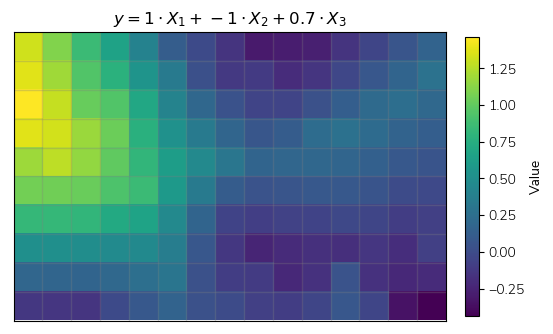

In [15]:
env.plot_state_values()

In [17]:
env.state_values.shape

(10, 15)

In [18]:
env.size

(10, 15)

In [226]:
min_idx = np.where(env.state_values == env.state_values.min())
env.move_predator_to_idx(min_idx[0][0], min_idx[1][0])


In [123]:
env.size

(10, 15)

In [239]:
est_params = [0, 0, 0, 0]

def td_update(distance_arrays, predator_idx, est_params, alpha=0.3):
    
    predator_idx_values = np.array(env.distance_arrays)[:, predator_idx[1], predator_idx[0]]
    pe = predator_idx_values - est_params
    
    return est_params + alpha * pe

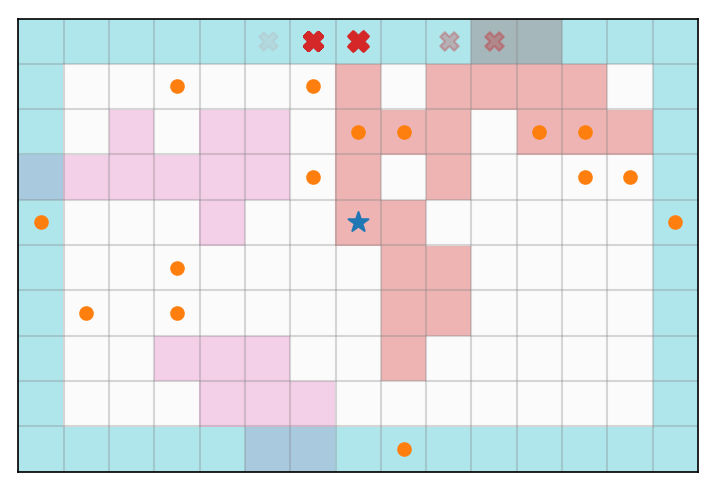

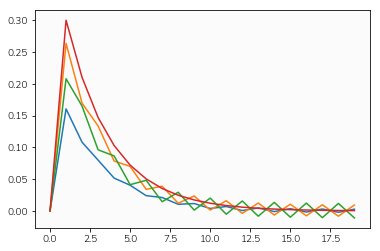

In [240]:
est_params = np.zeros((20, 4))

for i in range(19):
    env.move_predator(policy='max')
    est_params[i+1, :] = td_update(env.distance_arrays, env.predator_idx, est_params[i, :])

env.plot_environment()

plt.figure()
plt.plot(est_params)
# env.plot_environment(filename='moved_predator1.svg')

In [428]:
def beta_update(distance_arrays, prev_predator_idx, predator_idx, beta_params, weight=1):
    
    # Beta params shape = (n params, a b) = (n, 2)
    
    prev_predator_idx_values = np.array(env.distance_arrays)[:, prev_predator_idx[1], prev_predator_idx[0]]
    predator_idx_values = np.array(env.distance_arrays)[:, predator_idx[1], predator_idx[0]]
    
    # Difference between feature values for previous and current position
    diff_predator_idx_values = predator_idx_values - prev_predator_idx_values
    
    beta_params[:, 1] += weight * np.abs(np.minimum(diff_predator_idx_values, 0))
    beta_params[:, 0] += weight * np.maximum(diff_predator_idx_values, 0)

    return beta_params
    

In [244]:
np.minimum(np.array([-0.2, 0.4, 0.2, -0.3]), 0)

array([-0.2,  0. ,  0. , -0.3])

In [483]:
def get_beta_mean(beta_params):
    mean = beta_params[:, :, 0] / (beta_params[:, :, 0] + beta_params[:, :, 1])
    return (mean - 0.5) * 2

def get_beta_variance(beta_params):
    return (beta_params[:, :, 0] * beta_params[:, :, 1]) / (np.power(beta_params[:, :, 0] + beta_params[:, :, 1], 2) * (beta_params[:, :, 0] + beta_params[:, :, 1] + 1))

In [493]:
beta_params = np.ones((20, 4, 2)) * 0.2

In [501]:
beta_params = np.ones((20, 4, 2)) * beta_params[-1, ...]

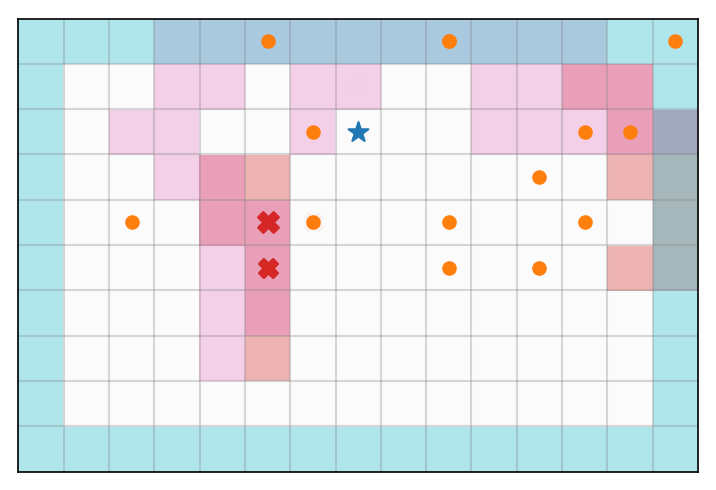

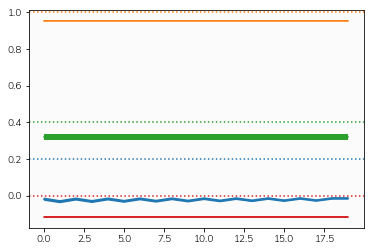

In [502]:
p = Predator((0.2, 1, 0.4, 0), name='Predator 1')
f1 = EnvironmentFeature(n_clusters=3, cluster_size_mean=15, cluster_size_sd=10, name='Water')
f2 = EnvironmentFeature(n_clusters=3, cluster_size_mean=15, cluster_size_sd=10, name='Shadow')
edge_array = np.ones((10, 15), dtype = int)
edge_array[1:-1,1:-1] = 0
f3 = EnvironmentFeature(feature_array=edge_array, name='Edge')
env = PredatorEnvironment(features=[f1, f2, f3], n_rewards=15, predator=p, name='Environment 1')
env.get_state_values()
# min_idx = np.where(env.state_values == env.state_values.min())
# env.move_predator_to_idx(min_idx[0][0], min_idx[1][0])
env.move_predator_to_idx(np.random.randint(0, 10), np.random.randint(0, 10))


prev_predator_idx = env.predator_idx

for i in range(19):
    env.move_predator(policy='max')
    beta_params[i+1, ...] = beta_update(env.distance_arrays, prev_predator_idx, env.predator_idx, beta_params[i, ...], weight=5)
    prev_predator_idx = env.predator_idx

env.plot_environment()

plt.figure()
beta_means = get_beta_mean(beta_params)
plt.plot(beta_means)

var = get_beta_variance(beta_params)
for i in range(len(p.function)):
    plt.fill_between(range(beta_params.shape[0]), beta_means[:, i] - var[:, i], beta_means[:, i] + var[:, i])

for n, w in enumerate(p.function):
    plt.axhline(w, linestyle=':', c=plt.cm.tab10.colors[n])

# env.plot_environment(filename='moved_predator1.svg')

In [488]:
var

array([[ 0.00519735,  0.0044136 ,  0.00335957,  0.00318548],
       [ 0.00513622,  0.00423716,  0.00335264,  0.00318548],
       [ 0.00507888,  0.00407097,  0.00334271,  0.00318548],
       [ 0.00502711,  0.00391426,  0.00331102,  0.00318548],
       [ 0.00498394,  0.00391426,  0.00331102,  0.00312066],
       [ 0.00493174,  0.00391426,  0.00327961,  0.00312066],
       [ 0.0048923 ,  0.00391426,  0.00326381,  0.00312066],
       [ 0.00487288,  0.00391426,  0.00323339,  0.00312066],
       [ 0.00483449,  0.00391426,  0.0032179 ,  0.00312066],
       [ 0.00481537,  0.00391426,  0.00318842,  0.00312066],
       [ 0.00477799,  0.00391426,  0.00317323,  0.00312066],
       [ 0.00475916,  0.00391426,  0.00314465,  0.00312066],
       [ 0.00472275,  0.00391426,  0.00312975,  0.00312066],
       [ 0.00470422,  0.00391426,  0.00310204,  0.00312066],
       [ 0.00466874,  0.00391426,  0.00308742,  0.00312066],
       [ 0.0046505 ,  0.00391426,  0.00306053,  0.00312066],
       [ 0.00461592,  0.

In [481]:
beta_params[-1, :]

array([[ 25.38574339,  20.62262839],
       [ 24.61732268,   5.03977735],
       [ 41.22757008,  30.53440638],
       [ 32.25      ,  42.25      ]])

In [295]:
color

[array([ 0.12156863,  0.46666667,  0.70588235,  1.        ]),
 array([ 0.83921569,  0.15294118,  0.15686275,  1.        ]),
 array([ 0.89019608,  0.46666667,  0.76078431,  1.        ]),
 array([ 0.09019608,  0.74509804,  0.81176471,  1.        ])]

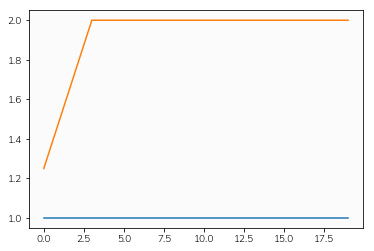

In [279]:
plt.plot(beta_params[:, 3, :])

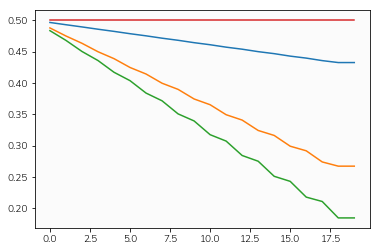

In [260]:
plt.plot(get_beta_mean(beta_params))

In [284]:
(beta_params[:, :, 0] + beta_params[:, :, 1])

SyntaxError: unexpected EOF while parsing (<ipython-input-284-de0d7073a1f5>, line 1)

In [243]:
np.array(env.distance_arrays)[:, 0, 2]

array([ 0.17800506,  0.23303501,  0.75746437,  1.        ])

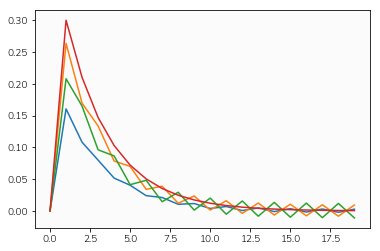

In [241]:
plt.figure()
plt.plot(est_params)

In [195]:
est_params = td_update(env.distance_arrays, env.predator_idx, est_params)
print(est_params)

[ 0.6276503   0.99960902  0.99960902  0.99960902]


In [162]:
np.array(env.distance_arrays)[:, 3, 3]

array([ 0.7763932 ,  0.89153477,  0.80388386,  0.25      ])

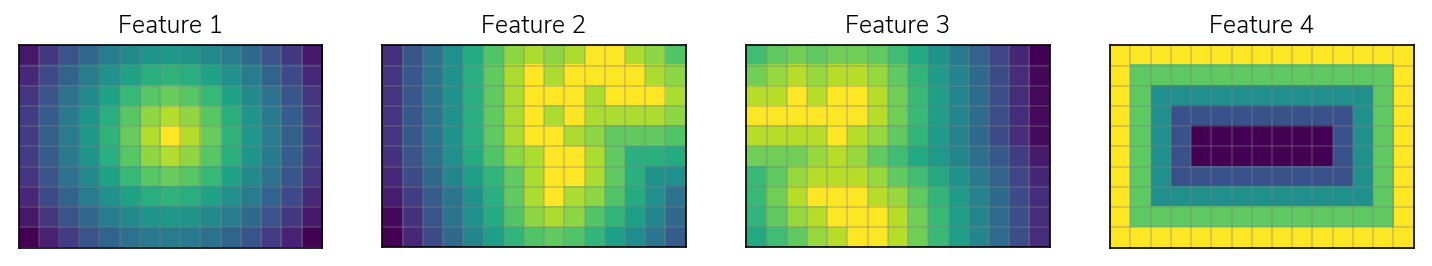

In [232]:
env.plot_distances()

In [64]:
edge_array

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [52]:
env.predator_idx

(9, 6)

In [660]:
1 - (3.8 / 6)

0.5333333333333334

In [55]:
env.move_prey(3, 3)

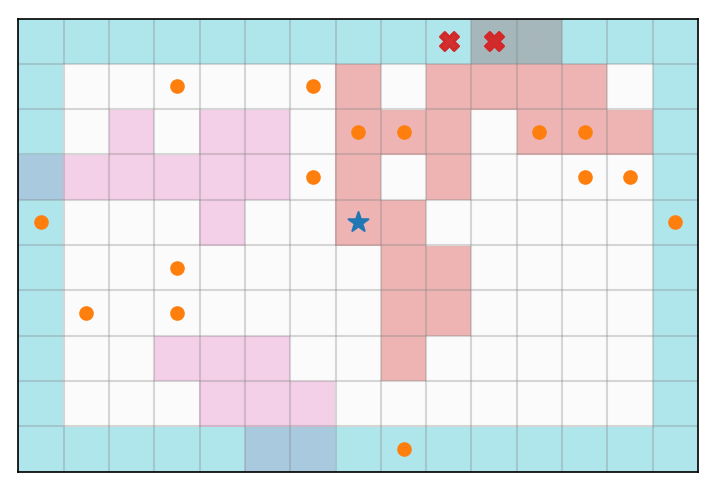

In [227]:
env.plot_environment()

In [770]:
env.predator_move_history = []
env.predator_idx = [6, 0]

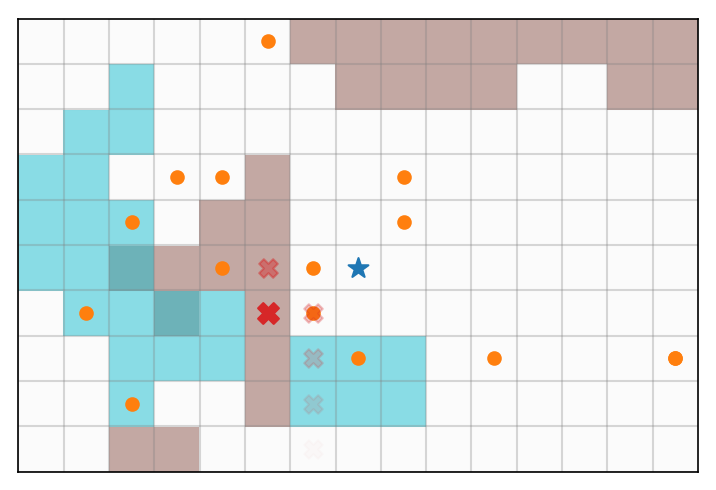

In [778]:
# env.predator_move_history = []
# env.predator_idx = [6, 0]
env.move_predator(policy='max')
env.plot_environment(filename='moved_predator2.svg')

In [98]:
# p = Predator((0.8, 1, 0))
# env.predator = p
# env.state_values = np.zeros(env.size)
env.plot_state_values()

IndexError: tuple index out of range

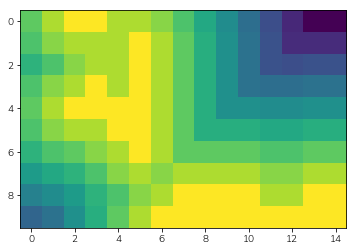

In [782]:
plt.imshow(env.distance_arrays[1])

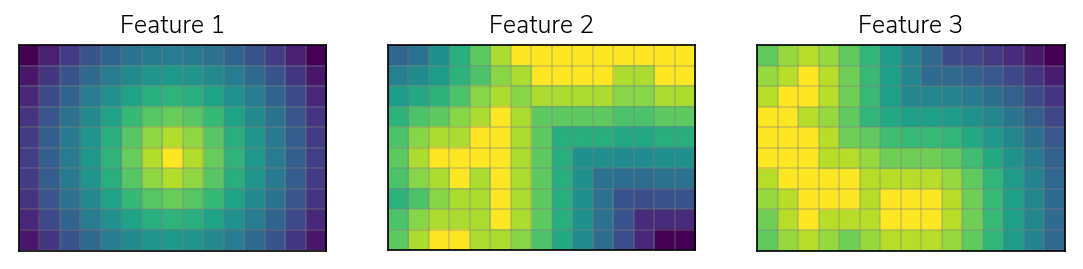

In [731]:
env.plot_distances()

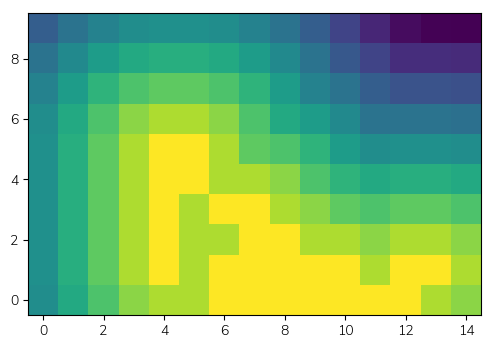

In [612]:
f, ax = plt.subplots(dpi=100)
plt.imshow(env.distance_arrays[1], origin='lower')

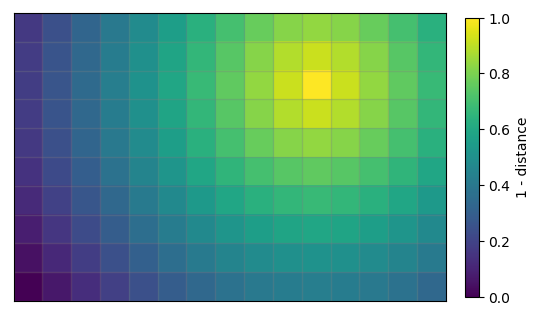

In [456]:
env.plot_distance()

(5, 15)

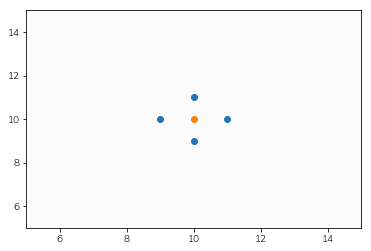

In [538]:
idx = [10, 10]

# ii = [[10, 9], [10, 11], [9, 10], [11, 10]]
options = [np.array(idx) + np.array(i) for i in [[0, -1], [0, 1], [-1, 0], [1, 0]]]


plt.scatter(idx[0], idx[1], color='tab:orange')

for i in options:
    plt.scatter(i[0], i[1], color='tab:blue')
    
plt.xlim(5, 15)
plt.ylim(5, 15)

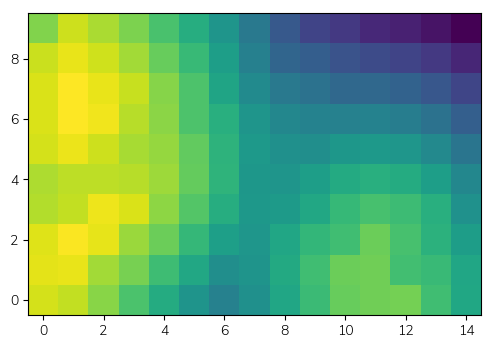

In [549]:
env.get_state_values()
f, ax = plt.subplots(dpi=100)
plt.imshow(env.state_values, origin='lower')

In [550]:
env.state_values[env.predator_idx[::-1]]

1.046533133313897

In [556]:
adj_idx = get_adjacent_idx(env.predator_idx)
options = [env.state_values[tuple(i[::-1])] for i in adj_idx]

In [558]:
from scipy.special import softmax

In [566]:
softmax(options)

array([ 0.00653006,  0.01655466,  0.01741168,  0.9595036 ])

In [565]:
options[3] = 5

In [543]:
env.state_values.shape

(10, 15)

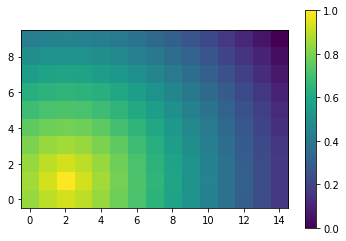

In [403]:
plt.imshow(env._get_distance_from_prey(), origin='lower')
plt.colorbar()

In [375]:
env.size

(10, 15)

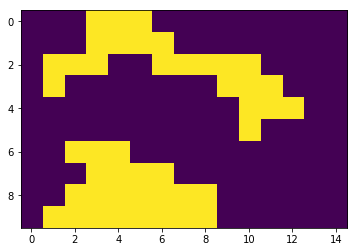

In [350]:
plt.imshow(env.feature_arrays[0])

In [332]:
env.feature_arrays[0].shape

(10, 15)

In [358]:
env.prey_idx

(6, 1)

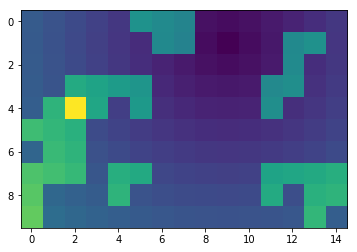

In [278]:
print(env.prey_idx, env.predator_idx)

(8, 12) (7, 12)


In [273]:
env.size

(10, 15)

TypeError: Invalid dimensions for image data

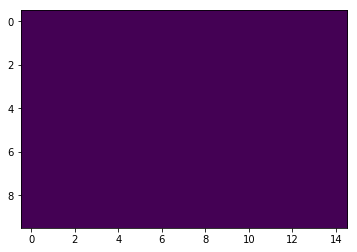

In [179]:
ee = np.zeros(15, 10)



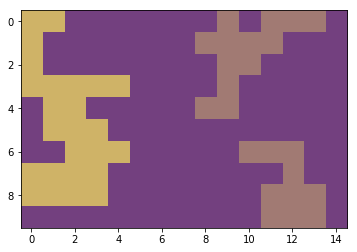

In [176]:
plt.imshow(env.env_array, cmap='Greys')
plt.imshow(env.feature_arrays[0], alpha=0.5)
plt.imshow(env.feature_arrays[1] * 2, alpha=0.5)
plt.show()

In [168]:
env.feature_arrays[1]

array([[ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

In [141]:
bb = np.array([10, 15])
cc = np.array([17, 18])

bb[cc > bb]

array([10, 15])

In [138]:
cc

[3, 18]

In [124]:
ee = np.ones((15, 10))

In [126]:
ee[tuple([10, 2])]

1.0

In [13]:
env.env_array

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [47]:
water = EnvironmentFeature()

In [52]:
s = (15, 10)

print(np.random.randint(s[0]), np.random.randint(s[1]))

14 1


In [59]:
int(np.random.normal(10, 5))

9

In [100]:
possible_transitions = np.nonzero(aa)

selected_transition = np.random.choice(np.arange(len(possible_transitions[0])), p = aa[possible_transitions])
selected_transition_idx = np.stack(possible_transitions).T[selected_transition] - np.array([1, 1])
idx += selected_transition

In [103]:
selected_transition_idx

array([1, 0], dtype=int64)

In [101]:
selected_transition_idx

array([2, 1], dtype=int64)

In [94]:
selected_transitiion

array([1, 0], dtype=int64)

In [81]:
possible_transitions = np.nonzero(aa)

In [83]:
len(possible_transitions[0])

4

In [87]:
aa[possible_transitions]

array([ 0.25,  0.25,  0.25,  0.25])

array([[0, 1],
       [1, 0],
       [1, 2],
       [2, 1]], dtype=int64)

In [92]:
np.argwhere(aa > 0)

array([[0, 1],
       [1, 0],
       [1, 2],
       [2, 1]], dtype=int64)

In [70]:
possible_transitions[0]

array([0, 1], dtype=int64)

In [64]:
np.argwhere(aa)

array([[0, 1],
       [1, 0],
       [1, 2],
       [2, 1]], dtype=int64)

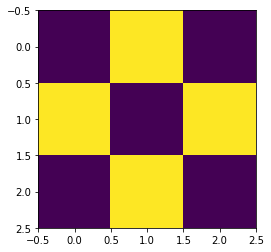

In [44]:
aa = np.zeros((3, 3))
aa[0, 1] = 1
aa[1, 0] = 1
aa[2, 1] = 1
aa[1, 2] = 1
plt.imshow(aa)

In [27]:
aa

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

[2, 1]

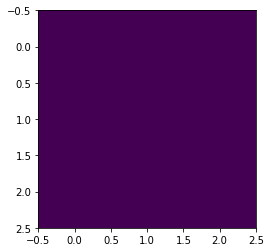